In this notebook, we will dive into how to optmize our visualizations at each step of a data science workflow.

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [27]:
pollution_data = pd.read_csv("assets/pollution-wide.csv")

market_data = pd.read_csv("assets/markets-cleaned.csv", index_col = [0])

We, as data scientists hopefully in the future, don't care of how do the visualizations in the EDA step look like. Instead, we care mainly that they contain the maximum information describing the data.

## Describing data

Some important functions, which gives a quick overview of the data that will help you in your visualizations later:

* `df.head()` : prints first few rows of the data to get information about the columns and their type (continuous, ordinal, nominal)
* `df.describe()` : shows the statistics of the data

In [28]:
pollution_data.head()

,city,year,month,day,CO,NO2,O3,SO2
0,Cincinnati,2012,1,1,0.245,20.0,0.030,4.20
1,Cincinnati,2012,1,2,0.185,9.0,0.025,6.35
2,Cincinnati,2012,1,3,0.335,31.0,0.025,4.25
3,Cincinnati,2012,1,4,0.305,25.0,0.016,17.15
4,Cincinnati,2012,1,5,0.345,21.0,0.016,11.05


In [29]:
pollution_data.describe(
    percentiles=[0.25, 0.5, 0.75], # add these percentiles in our data describtion
    include = "all"
)

,city,year,month,day,CO,NO2,O3,SO2
count,8888,8888.000000,8888.000000,8888.000000,8888.000000,8888.000000,8888.000000,8888.000000
unique,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Houston,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2013.621737,6.657516,187.187894,0.492867,23.689168,0.035904,3.824927
std,NaN,1.084081,3.328182,101.739060,0.403896,16.760212,0.013221,6.582867
min,NaN,2012.000000,1.000000,1.000000,-0.150000,0.000000,0.000000,-1.300000
25%,NaN,2013.000000,4.000000,102.000000,0.250000,11.000000,0.027000,0.500000
50%,NaN,2014.000000,7.000000,192.000000,0.350000,22.000000,0.036000,1.650000
75%,NaN,2015.000000,9.000000,272.000000,0.551875,34.600000,0.045000,4.150000


count, unique, top, and freq are mainly for categorial variables while the mean, std, min, max, and the percentiles are mainly for continuous (or encoded categorial) variables. 

We can have a quick very informative plot that visualizes the correlation between the continuous variables in the data using `pd.plotting.scatter_matrix` function.

```python
pd.plotting.scatter_matrix(
    data,
    alpha = 0.2
)
```

C:\Users\U\AppData\Local\Temp/ipykernel_16128/3297410689.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(


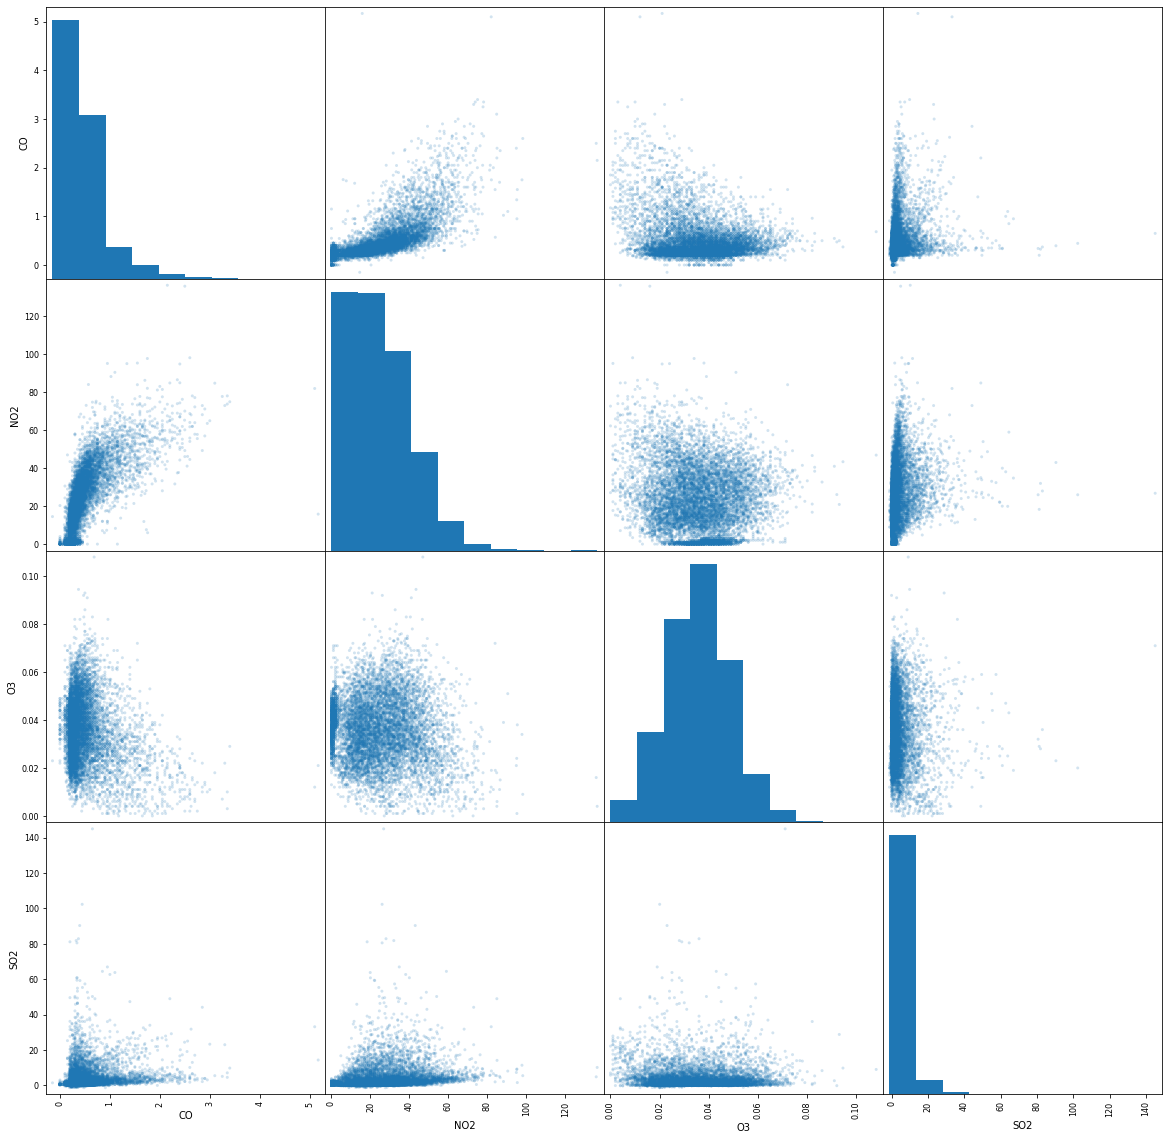

In [30]:
plt.figure(figsize=(20, 20))

pd.plotting.scatter_matrix(
    pollution_data.loc[:, ["CO", "NO2", "O3", "SO2"]],
    alpha = 0.2,
    ax = plt.gca()
);

In [31]:
market_data.head()

,name,city,county,state,lat,lon,months_open,Bakedgoods,Beans,Cheese,...,Prepared,Seafood,Soap,Tofu,Trees,Vegetables,WildHarvested,Wine,num_items_sold,state_pop
0,Island Market,Key Largo,Monroe,Florida,-80.427218,25.109214,6,1,1,1,...,1,1,1,0,0,1,0,0,18,19893297.0
1,COFFO Harvest Farmers' Market,Florida City,Miami-Dade,Florida,-80.482299,25.449850,12,0,0,0,...,1,0,0,0,1,1,0,0,7,19893297.0
2,COFFO Harvest Farmers' Market,Homestead,Miami-Dade,Florida,-80.483400,25.463500,12,0,0,0,...,1,0,0,0,1,1,0,0,7,19893297.0
3,Verde Gardens Farmers Market,Homestead,Miami-Dade,Florida,-80.395607,25.506727,12,0,0,0,...,1,0,0,0,0,1,0,0,5,19893297.0
4,Verde Community Farm and Market,Homestead,Miami-Dade,Florida,-80.395607,25.506727,9,0,0,0,...,0,0,0,0,0,1,0,0,5,19893297.0


If you have too many columns in your data, probably you won't be able to see them all in some editors like Jupyter Notebook. A good trick is to transpose it.

In [32]:
market_data.head(3).transpose()

,0,1,2
name,Island Market,COFFO Harvest Farmers' Market,COFFO Harvest Farmers' Market
city,Key Largo,Florida City,Homestead
county,Monroe,Miami-Dade,Miami-Dade
state,Florida,Florida,Florida
lat,-80.427218,-80.482299,-80.4834
lon,25.109214,25.44985,25.4635
months_open,6,12,12
Bakedgoods,1,0,0
Beans,1,0,0
Cheese,1,0,0


Again, we can show the description of the data using `.describe`

In [33]:
market_data.describe(
    include="all",
    percentiles=[0.5]
).transpose()

,count,unique,top,freq,mean,std,min,50%,max
name,5343,5075,Main Street Farmers Market,8,NaN,NaN,NaN,NaN,NaN
city,5340,3177,Washington,39,NaN,NaN,NaN,NaN,NaN
county,5341,1122,Washington,64,NaN,NaN,NaN,NaN,NaN
state,5343,49,New York,450,NaN,NaN,NaN,NaN,NaN
lat,5339.0,NaN,NaN,NaN,-89.888501,15.75041,-124.416226,-85.701673,-67.277359
lon,5339.0,NaN,NaN,NaN,39.45391,4.483651,25.109214,40.056583,48.943331
months_open,5343.0,NaN,NaN,NaN,6.376567,2.674895,1.0,6.0,12.0
Bakedgoods,5343.0,NaN,NaN,NaN,0.885458,0.318499,0.0,1.0,1.0
Beans,5343.0,NaN,NaN,NaN,0.144862,0.351995,0.0,0.0,1.0
Cheese,5343.0,NaN,NaN,NaN,0.492981,0.499998,0.0,0.0,1.0


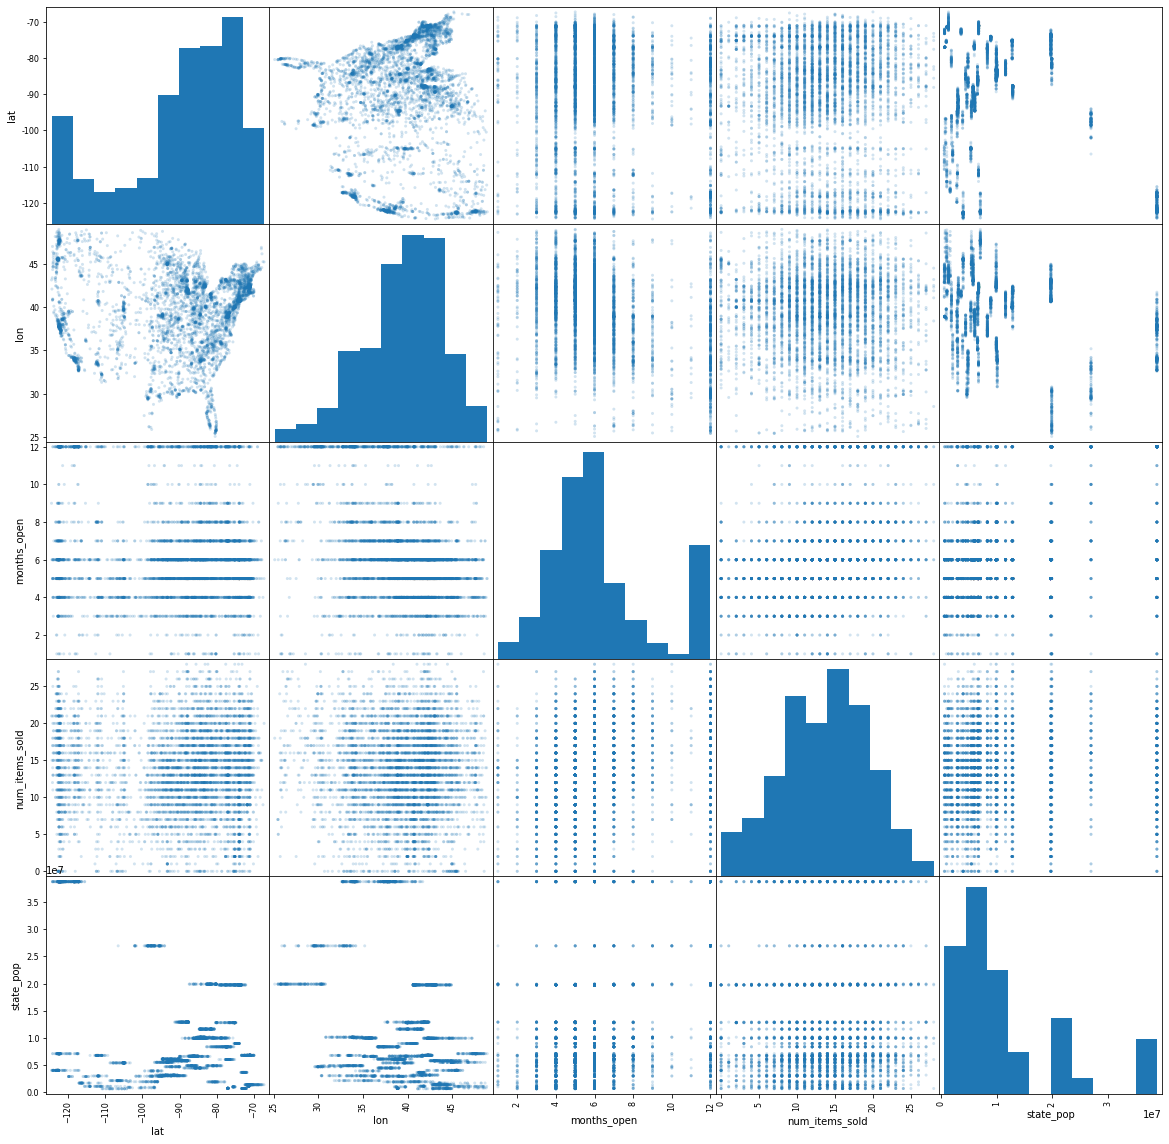

In [37]:
numeric_values = ["lat", "lon", "months_open", "num_items_sold", "state_pop"]

pd.plotting.scatter_matrix(
    market_data[numeric_values],
    alpha = 0.2,
    figsize = (20, 20)
);

## Exploring the patterns

Clearly we can't see the patterns clearly between some variables, e.g.,  `lat` vs `month_open`. We should dig deeper in these patterns and try to investigate them further. One of the ways to find such pattern is to use the `regplot` function from `seaborn`. However, you should be very careful when infering from this pattern because it will have its own assumptions.

<AxesSubplot:xlabel='lat', ylabel='months_open'>

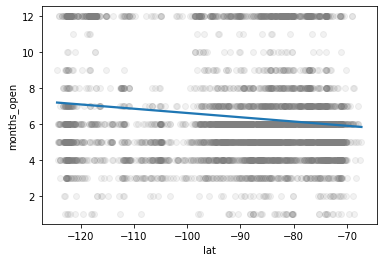

In [41]:
sns.regplot(
    data = market_data,
    x = "lat",
    y = "months_open",
    scatter_kws = {"alpha": 0.1, "color": "gray"},
    ci = False
)

We can also use annotations to highlight and drive interest to some specific point.

In [48]:
markets_and_pop_logged = (market_data.groupby(
    by = 'state',
    as_index = False
).agg(
    {
        "name": lambda d: np.log(len(d)),
        "state_pop": lambda d: np.log(d.iloc[0])
    }
).rename(
    columns = {
        "name" : "log_market_number",
        "state_pop": "log_state_pop"
    }
))

markets_and_pop_logged.head()

,state,log_market_number,log_state_pop
0,Alabama,4.262680,15.394361
1,Arizona,4.189655,15.722306
2,Arkansas,4.077537,14.902849
3,California,6.091310,17.473995
4,Colorado,4.584967,15.493703


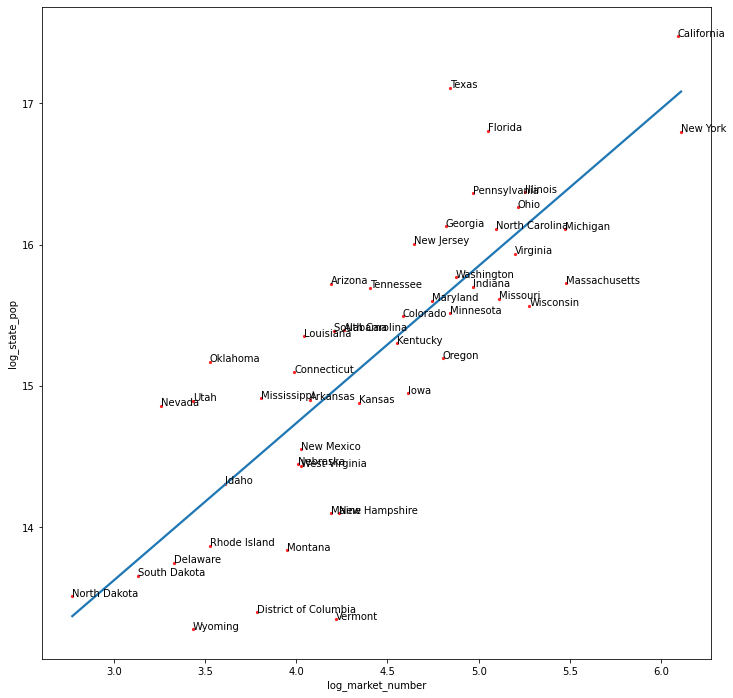

In [61]:
plt.figure(figsize=(12, 12))

sns.regplot(
    data = markets_and_pop_logged,
    x = "log_market_number",
    y = "log_state_pop",
    scatter_kws = {"color": "red", "s": 5},
    ci = False
)

for index, row in markets_and_pop_logged.iterrows():
    state, log_market_number, log_state_pop = row
    plt.annotate(state, xy = (log_market_number, log_state_pop), size = 10)


We want to see if there are any interesting patterns regarding how likely you are to find a given good at state's markets.

In [94]:
goods_to_plot = ["Cheese", "Maple", "Fruits", "Grains", "Seafood", "Plants", "Vegetables"]

good_data = market_data.groupby("state", as_index = False).agg(
    {
        good: lambda d: sum(d)/len(d) for good in goods_to_plot
    }
)

good_by_state = pd.DataFrame()

for i in range(good_data.shape[0]):
    for good in goods_to_plot:
        curr_data = pd.DataFrame({
            "state": [good_data.iloc[i, 0]],
            "good": [good],
            "prop_selling": [good_data.loc[i, good]]
        })
        good_by_state = pd.concat([good_by_state, curr_data])
       

good_by_state = good_by_state.reset_index().drop(columns = ["index"])

good_by_state.head()

,state,good,prop_selling
0,Alabama,Cheese,0.225352
1,Alabama,Maple,0.014085
2,Alabama,Fruits,0.760563
3,Alabama,Grains,0.098592
4,Alabama,Seafood,0.056338


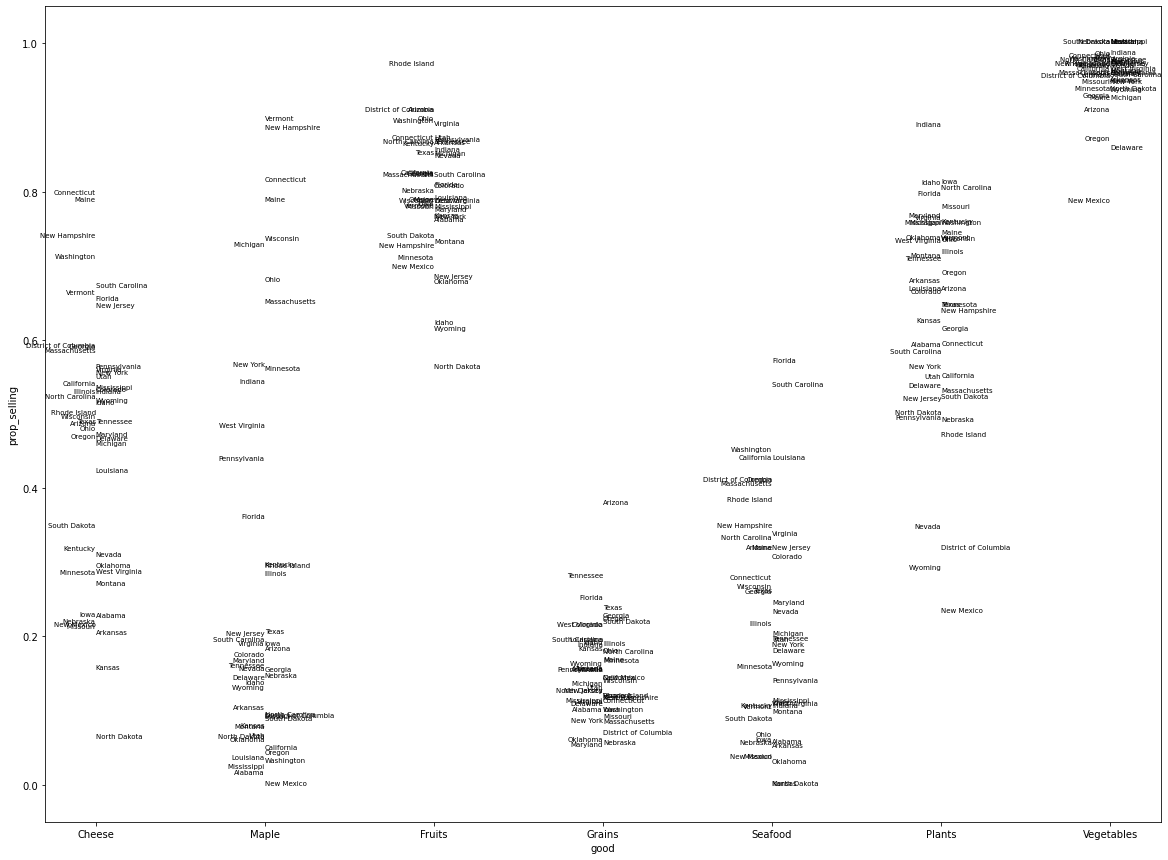

In [93]:
plt.figure(figsize=(20, 15))

sns.scatterplot(
    data = good_by_state,
    x = "good",
    y = "prop_selling",
    s = 0 # the s is 0 because we want to show the state annotations 
)

for index, row in good_by_state.iterrows():
    state, good, prop_selling = row
    align = "left" if index % 2 == 0 else "right"
    plt.annotate(state, xy=(good, prop_selling), ha = align, size = 7)

## Efficient visualizing

What is efficient ?

* Reduce effort needed to see story
* Re-organize plots to keep focus
* Improve ink-to-info ratio

There are two ways we can use to make our visulization more efficient:

#### 1. Combining plots using subplots

Here we can use the `plt.subplots()` function like this

```python
fig, axes = plt.subplots(
    1, # here we specify we want 1 row
    2, # here we specify we want 2 columns
)

# to access the axes of the first row and second column to plot something
axes[0][1].plot(x, y)
```

For example, we want to visualize a line plot between the month and the NO2 concentration at different years for Cincinnati. At the same time, we want to have a look at the number of observations took at each year side-by-side.

<AxesSubplot:xlabel='year', ylabel='count'>

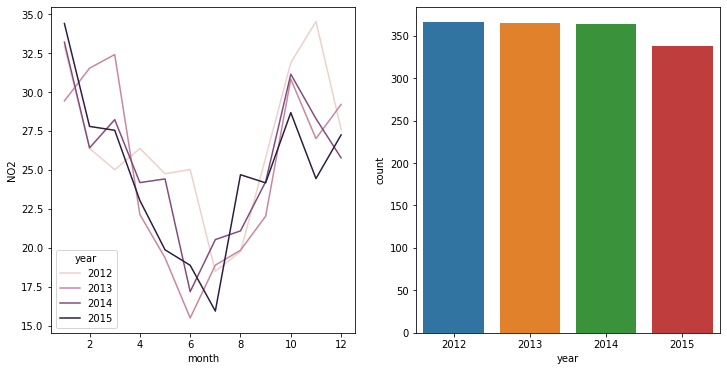

In [106]:
poll_cinci = pollution_data.query("city == 'Houston'")

fig, axes = plt.subplots(1, 2, figsize = (12, 6))

sns.lineplot(
    data = poll_cinci,
    x = "month",
    y = "NO2",
    hue = "year",
    ci = None,
    ax = axes[0]
)

sns.countplot(
    data = poll_cinci,
    x = "year",
    ax = axes[1]
)

Here, we can do 2 things:

* Make the color of the line for a year is the same color as the bar of that year in the second plot. We can do this by using the same color palette.
* Remove the legend as we can interpret the color of the year from the count plot. 

<AxesSubplot:xlabel='year', ylabel='count'>

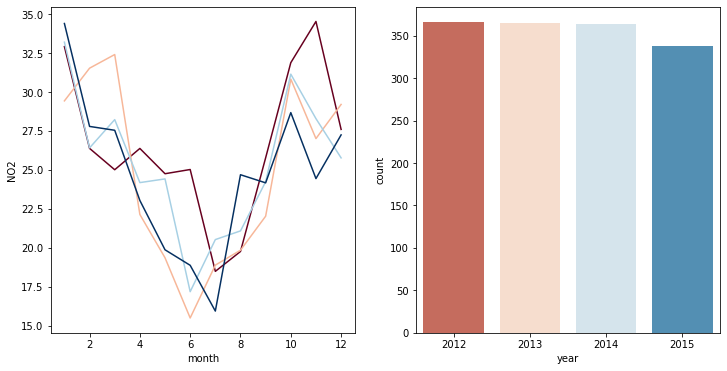

In [111]:
poll_cinci = pollution_data.query("city == 'Houston'")

fig, axes = plt.subplots(1, 2, figsize = (12, 6))

sns.lineplot(
    data = poll_cinci,
    x = "month",
    y = "NO2",
    hue = "year",
    ci = None,
    ax = axes[0],
    palette = "RdBu",
    legend = False
)

sns.countplot(
    data = poll_cinci,
    x = "year",
    ax = axes[1],
    palette = "RdBu",
    dodge = False
)

#### 2. Tweaking plots

* Grids: you may want to remove the grid or keeping it with different according to who these visualizations are presented to, e.g., journal, your team, customer, etc.

```python
sns.set_style("darkgrid")
sns.set_style("dark")
sns.set_style("whitegrid")
sns.set_style("white")
sns.set_style("ticks")
```

* Spines

```python
sns.despine(
    top = True, # by default
    right = True, # by default
    bottom = False, # by default
    left = False, # by default
)
```

* Font size

```python
sns.set(font_scale = 1)
sns.set(font_scale = 1.2)
sns.set(font_scale = 1.5)
sns.set(font_scale = 2)
```